# Intro

## Task

Предсказать с помощью линейной регрессии цену дома по остальным параметрам

# Main

In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [101]:
df = pd.read_csv('./data/2_housing_data.csv')
df.dropna(subset = ['RAD'], axis = 0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [88]:
df = pd.read_csv('./data/2_housing_data.csv')

df.columns = list(map(lambda x: x.lower(), df.columns))
df['medv'] = df.medv * 1000 # price in $
df['nox'] = df.nox * 10 # concetration (parts per 1000 million)

df = df.dropna()

In [89]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,5.38,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,4.69,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,4.69,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,4.58,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33400.0
5,0.02985,0.0,2.18,0.0,4.58,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28700.0


In [93]:
X = df[df.columns[:-1]]
y = df.medv


TRAIN_TEST_RATIO = 0.8
train_number = round(X.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = X[:train_number] # избегание ошибки с одномерным массивом
y_train = y[:train_number]

X_test = X[train_number:] # избегание ошибки с одномерным массивом
y_test = y[train_number:]


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

MSE: 20,369,494
R^2: 0.76


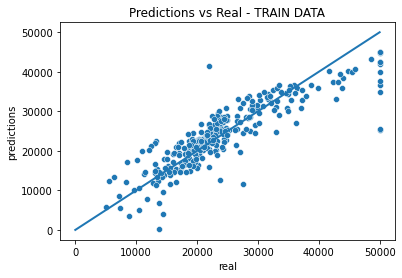

In [91]:
print('MSE: {:,.0f}'.format(mean_squared_error(y_train, model.predict(X_train))))
print('R^2: {:.2f}'.format(model.score(X_train, y_train)))

g = sns.scatterplot(x = y_train, 
                y = model.predict(X_train)
               )
g.set_title('Predictions vs Real - TRAIN DATA')
g.set(xlabel = 'real', ylabel = 'predictions')
plt.plot([0, 50000], [0, 50000], linewidth=2)
plt.show()

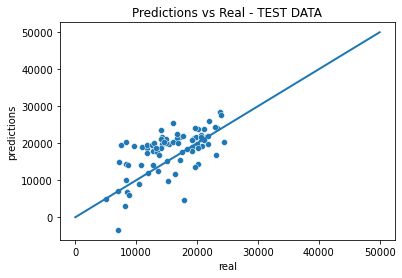

In [92]:
g = sns.scatterplot(x = y_test, 
                y = model.predict(X_test)
               )
g.set_title('Predictions vs Real - TEST DATA')
g.set(xlabel = 'real', ylabel = 'predictions')
plt.plot([0, 50000], [0, 50000], linewidth=2)
plt.show()

В целом модель предсказывает цены со стабильной точностью, в том числе на тестовых даннных  
  
Проблемы:  
1  
Проблемы в предсказаниях есть в сегменте дорогих квартир, где предсказанная цена сильно занижена.  
Гипотеза - фича возраста дома в целом отрицательно скореелирована с ценой, однака среди старых домов есть престижные и изза линейности модели не учитывается повышение цены в таком случае, вохможно неточность изза этого.  
МВП решение: добавить dummy variable is very old, а в идеале разметить именно старинные дома где возраст играет положительную роль.

2    
Надо корректно сплитовать данные на тест и трейн, а то щзас дорогие квартиры вообще не попали

**Resume:**  
Model explains 77% of target variable dispersion (R^2 = 0.77), that is pretty significant number 
MSE is 19,418,398
  
Model already has potentioal to be good with already existing data, although, needed validation to test against real (test) data, and not to be compared to train data

**Questions:**  
1. Что если модель стала лучше предсказывать после добавления нового фактора (фичи) (в соответствии с R^2 adjusted), но при этом сам фактор незначимый?